# Python Assignment 3

⏱⏱⏱**Due: 12/01/2024 11:59:59 PM** ⏱⏱⏱

Please submit your notebook files and upload them to your Git repository. Don't forget to include a link to your Git repository when submitting this file on Brightspace.

Total points: 150 (equivalent to 15 points after conversion)

I have provided some guidance in comments to help you through the steps, but feel free to approach this in a different way if you prefer. **Feel free to disregard my comments if you have an alternative approach in mind.**

## 1. Good presentation of your code and outputs; submitting your files to Github (10 pts)

Ensure thorough and clear comments within your code to explain its functionality.

Enhance your plots by adding titles, legends, and axis labels where appropriate to provide clarity.

If necessary, employ LaTex notation to present mathematical explanations within the notebook.

Divide your code into multiple blocks or cells in Jupyter Notebook and provide descriptive explanations for each block to improve readability.

As part of your submission, include the notebook files and upload them to your Git repository. Additionally, remember to provide a link to your Git repository when submitting the files on Brightspace.

Please adhere to the constraint of using only the `numpy`, `scipy`, and `matplotlib` libraries for this assignment, as it is feasible to complete the task without introducing additional libraries or packages.



## 2. Implementing Gradient Descent Algorithm (60 pts)

Given a function $f(x) = \sqrt{x^2+5}$, $x\in \mathbf{R}$.

Fact: This function is L-smooth.
0. Find the gradient of this function and the minimum value of this function analytically.


1. Plot this function over the interval $[-5, 5]$.
2. Perform the Gradient Descent algorithm to find the minimum value of $f$ for $50$ iterations ($T$) with a step size of $1$ ($\alpha$). Use the last digit of your SB ID divided by 5 and then plus 1 as the initial guess (for example, if your ID ends with 9, your initial guess $x_0$ will be $9\div5 + 1= 2.8$).
3. Record the values of $x_k$ at the $k$-th iteration during GD and report $x_T$.
4. Plot the value of $f(x_k)$ v.s. the iteration number $k$.
5. For each of the step sizes 5, 3, 1, and 0.5, perform gradient descent and record the values of $x_k$ in each step $k$. Plot $f(x_{k-1}) - f(x_{k})$ v.s. $k$ for each step size. Your graphs should all be included in a single plot. Examine if $f(x_{k-1}) - f(x_{k})$ (which means that $f(x_k)$ is always decreasing) is alway positive for all $k$.

Here are some sample output graphs. Yours do not have to look exactly like mine, it is just for your reference.
![o1](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o1.png)
![o2](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o2.png)
![o3](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o3.png)

Please note that the graphs generated as output may not precisely match the ones I'm providing here. The disparities could be significant, as I'm presenting a general overview of the expected graph. I've adjusted certain parameters/plot information in the graph generation process to prevent disclosing the "answer/solution".&nbsp;


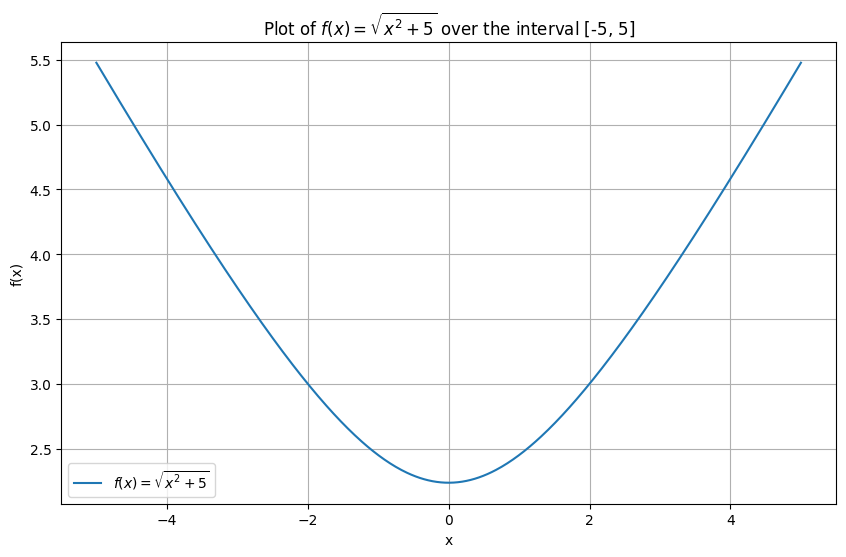

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x).
def f(x):
    return np.sqrt(x**2 + 5)

# Plot the function f(x), np.linspace might be helpful.
x_values = np.linspace(-5, 5, 500)  # Generate 500 points between -5 and 5
y_values = f(x_values)

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label=r'$f(x) = \sqrt{x^2 + 5}$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of $f(x) = \sqrt{x^2 + 5}$ over the interval [-5, 5]')
plt.legend()
plt.grid(True)
plt.show()


Value of x after 50 iterations: x_T = 7.136039372775195e-13


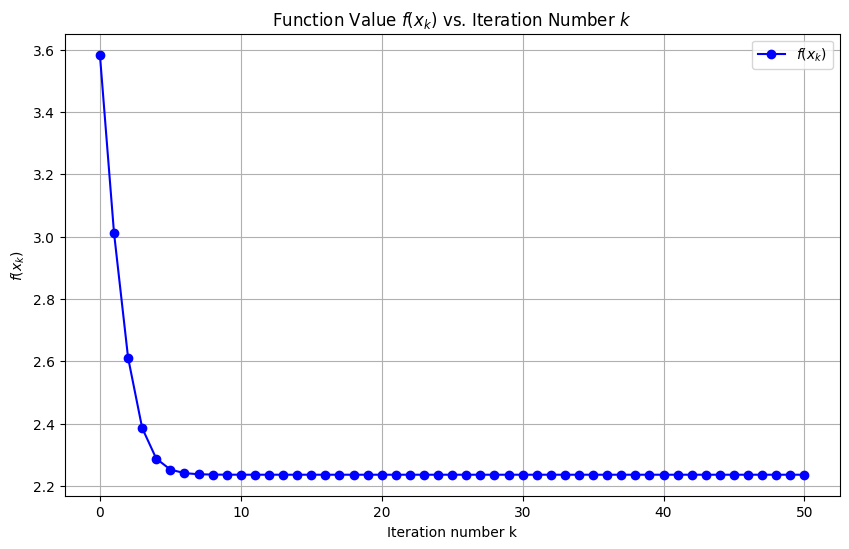

In [2]:
# Define the derivative of the function f(x), for gradient descent
def df(x):
    return x / np.sqrt(x**2 + 5)

# Write a function to run the Gradient Descent Algorithm
# The function should take input arguments x_0, step_size, and num_iterations; and return a list/array of x_k values
def gradient_descent(x_0, step_size, num_iterations):
    x_values = [x_0]  # List to store x values during each iteration
    x = x_0

    for i in range(num_iterations):
        # Update x using the gradient descent rule
        x = x - step_size * df(x)
        # Append the updated x to the list
        x_values.append(x)

    return x_values

# Set up/assign initial values
x_0 = 2.8  # Initial guess
step_size = 1  # Step size alpha
num_iterations = 50  # Number of iterations T

# Run gradient descent by calling the function
x_k_values = gradient_descent(x_0, step_size, num_iterations)

# Report x_T by printing out the value
x_T = x_k_values[-1]
print(f"Value of x after {num_iterations} iterations: x_T = {x_T}")

# Plot the f(x_k) values vs. iteration number
f_values = [f(x) for x in x_k_values]  # Calculate f(x_k) for each x_k

plt.figure(figsize=(10, 6))
plt.plot(range(len(f_values)), f_values, marker='o', linestyle='-', color='b', label=r'$f(x_k)$')
plt.xlabel('Iteration number k')
plt.ylabel(r'$f(x_k)$')
plt.title(r'Function Value $f(x_k)$ vs. Iteration Number $k$')
plt.legend()
plt.grid(True)
plt.show()


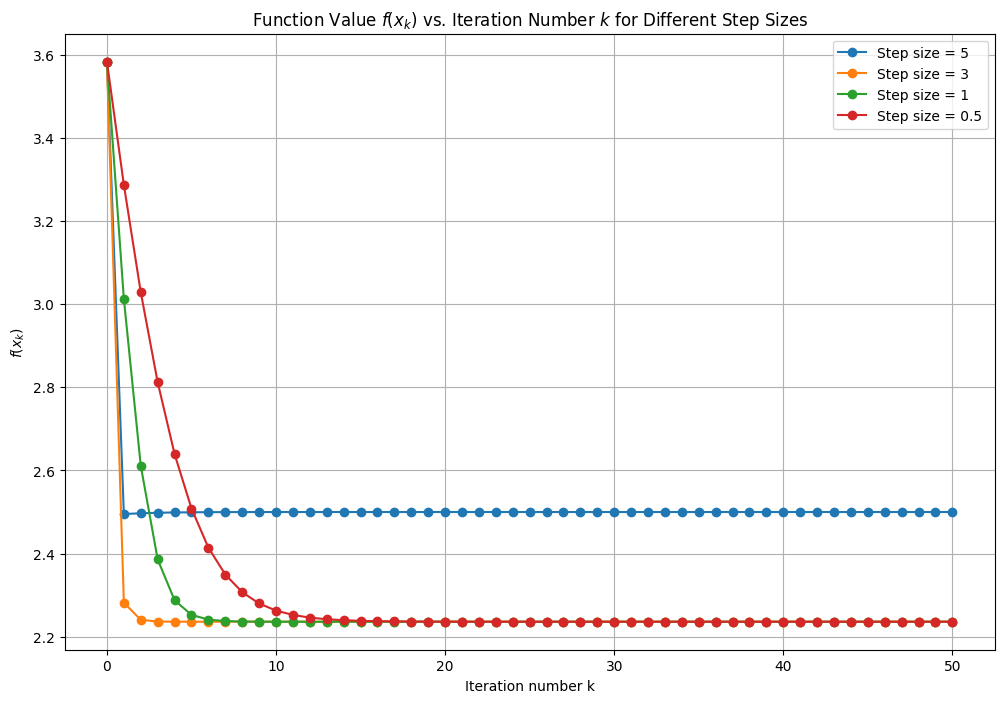

In [3]:
# Create a list containing different step sizes
step_sizes = [5, 3, 1, 0.5]

# Initialize a list to store the results from different step sizes
all_results = []

# Loop through the step sizes and perform GD, recording results
for step_size in step_sizes:
    x_k_values = gradient_descent(x_0, step_size, num_iterations)
    all_results.append((step_size, x_k_values))

# Plot multiple curves in a single graph
plt.figure(figsize=(12, 8))

for step_size, x_k_values in all_results:
    f_values = [f(x) for x in x_k_values]  # Calculate f(x_k) for each x_k
    plt.plot(range(len(f_values)), f_values, marker='o', linestyle='-', label=f'Step size = {step_size}')

plt.xlabel('Iteration number k')
plt.ylabel(r'$f(x_k)$')
plt.title(r'Function Value $f(x_k)$ vs. Iteration Number $k$ for Different Step Sizes')
plt.legend()
plt.grid(True)
plt.show()


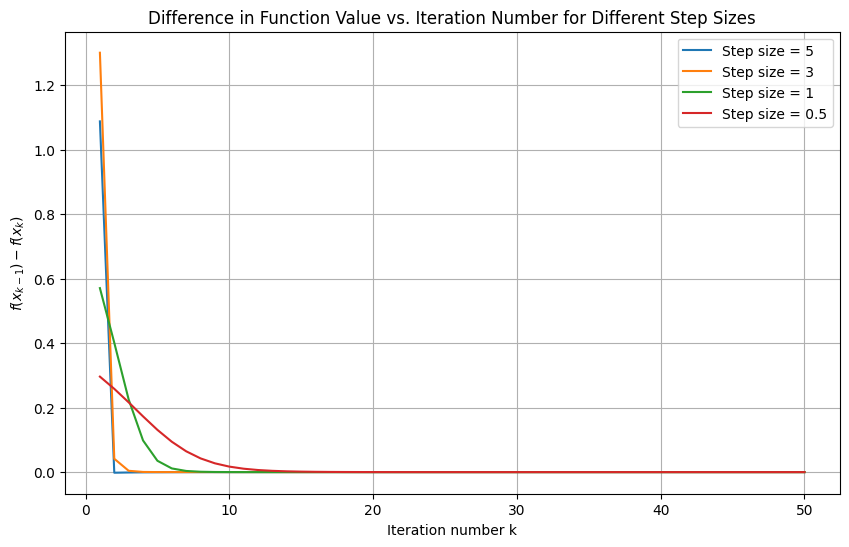

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def f(x):
    return np.sqrt(x**2 + 5)

def gradient_f(x):
    return x / np.sqrt(x**2 + 5)

def gradient_descent(initial_x, learning_rate, num_iterations):
    x = initial_x
    x_values = [x]
    for _ in range(num_iterations):
        grad = gradient_f(x)
        x = x - learning_rate * grad
        x_values.append(x)
    return x_values

# Plotting f(x_(k-1)) - f(x_k) vs. iteration number k for different step sizes
step_sizes = [5, 3, 1, 0.5]
num_iterations = 50
initial_x = 2.8

plt.figure(figsize=(10, 6))

for step_size in step_sizes:
    x_values = gradient_descent(initial_x, step_size, num_iterations)
    f_diff = [f(x_values[i-1]) - f(x_values[i]) for i in range(1, len(x_values))]
    plt.plot(range(1, len(f_diff) + 1), f_diff, label=f'Step size = {step_size}')

plt.xlabel('Iteration number k')
plt.ylabel('$f(x_{k-1}) - f(x_k)$')
plt.title('Difference in Function Value vs. Iteration Number for Different Step Sizes')
plt.legend()
plt.grid()
plt.show()


## 3. Linear Regression with Numpy and Graphing with Matplotlib (30 pts)

In class, we implemented a linear regression model with one-dimensional features ( $x$-values). However, below, you will find the code for generating synthetic data where the features ( $x$-values) are now two-dimensional.

**Change the random seed to be the last two digits of your student ID. For example, if your ID is 123456987, change the random seed to be 87.**

The next step involves performing linear regression on this newly generated data. We will employ the normal equation, a topic covered in class, to determine the coefficients and intercept (weights and bias).

**Report the parameter values and plot the generated data and the regression plane (in 1D, we have a line, but in 2D, we have a plane).** `numpy.linspace`, `numpy.meshgrid`, and [Surface Plot](https://matplotlib.org/stable/gallery/mplot3d/surface3d.html) methods might be helpful in plotting the plane. You don't have to use them, it is just my suggestions.

Here are some sample output graphs. Yours do not have to look exactly like mine, it is just for your reference.
![o1](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o4.png)



Intercept: 4.232358582404147
Coefficients: [3.96269703 0.30097603]


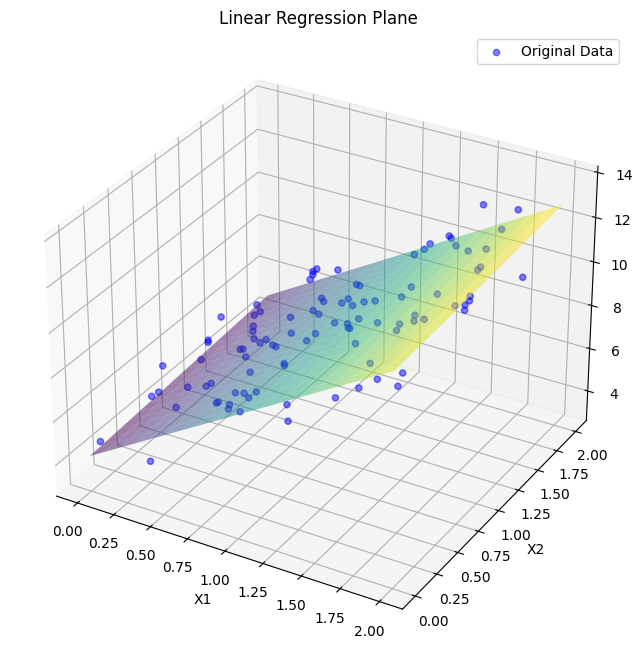

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(87)  # Change the seed to be the last two digits of your SB ID.
X = 2 * np.random.rand(100, 2)  # Generate 100 random 2D data points
y = 4 + 4 * X[:, 0] + 0.5 * X[:, 1] + np.random.randn(100)  # Generate y values with noise

# Add a column of ones to X for the bias terms (intercept) in the normal equation
X_b = np.c_[np.ones((100, 1)), X]  # X_b is the augmented matrix with a column of ones for intercept

# Find theta using the normal equation
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

# Print the intercept and coefficients of the regression plane
intercept = theta_best[0]
coefficients = theta_best[1:]
print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")

# Plot the generated data and the regression plane
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the original data points
ax.scatter(X[:, 0], X[:, 1], y, color='b', alpha=0.5, label='Original Data')

# Create a meshgrid for plotting the regression plane
x0_range = np.linspace(0, 2, 20)
x1_range = np.linspace(0, 2, 20)
X0, X1 = np.meshgrid(x0_range, x1_range)
Y = intercept + coefficients[0] * X0 + coefficients[1] * X1

# Plot the regression plane
ax.plot_surface(X0, X1, Y, alpha=0.5, cmap='viridis')

# Labels and title
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
ax.set_title('Linear Regression Plane')
ax.legend()

plt.show()


## 4. Logistic Regression with Numpy and Graphing with Matplotlib (20 pts)

In class, we implemented a logistic regression model to perform binary classification. Here, I provided the exact same code that we discussed in class, but the values for learning_rate and num_epochs are modified. I also removed all the comments. You task is to
1. Tune the Learning Rate and Number of Epochs: Your first task is to fine-tune the values for the learning_rate and num_epochs parameters. Your goal is to identify suitable values that will enable us to converge to a set of parameter values $\theta$ closely approximating the optimal parameter values $\theta^*$.
2. Code Explanation: To enhance code comprehension, please augment the code with meaningful comments. These comments should elucidate the purpose and functionality of each code segment, making it easier for readers to understand the logistic regression implementation.

By accomplishing these tasks, we aim to achieve a better understanding of the logistic regression model's behavior and its parameter optimization process.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Set random seed for reproducibility
np.random.seed(595)

# Generate random input data: 2 features and 100 samples
X = np.random.rand(2, 100)

# True weights for generating labels (used for creating synthetic data)
w_true = np.array([1.5, -2.5])
b_true = 1.0  # True bias

# Calculate true probabilities using sigmoid function (add some noise)
probabilities = sigmoid(np.dot(w_true.T, X) + b_true)

# Generate labels (0 or 1) based on probabilities
Y = (probabilities > 0.5).astype(int)

# Add noise to the input features for more realistic data
X = X + 0.3 * np.random.rand(2, 100) - 0.1 * np.random.rand(2, 100)

# Split data into training and test sets (80% train, 20% test)
X_train, X_test = X[:, :80], X[:, 80:]
Y_train, Y_test = Y[:80], Y[80:]

# Initialize weights and bias to zeros
w = np.zeros(X.shape[0])  # Initialize weights for 2 features
b = 0.0  # Initialize bias

# Hyperparameters: learning rate and number of epochs
learning_rate = 5.95  # Learning rate
num_epochs = 595  # Number of epochs for gradient descent

# Gradient Descent Algorithm for Logistic Regression
for epoch in range(num_epochs):
    # Calculate the predicted probability for training set using current weights and bias
    A_train = sigmoid(np.dot(w.T, X_train) + b)

    # Compute gradients for weights and bias
    dJdw = np.dot(X_train, (A_train - Y_train).T) / len(Y_train)  # Gradient w.r.t. weights
    dJdb = np.mean(A_train - Y_train)  # Gradient w.r.t. bias

    # Update weights and bias using gradients
    w -= learning_rate * dJdw
    b -= learning_rate * dJdb

# Final predictions for the training set
A_train = sigmoid(np.dot(w.T, X_train) + b)
predictions_train = (A_train > 0.5).astype(int)

# Final predictions for the test set
A_test = sigmoid(np.dot(w.T, X_test) + b)
predictions_test = (A_test > 0.5).astype(int)

# Calculate accuracy for training and test sets
train_accuracy = np.mean(predictions_train == Y_train)
test_accuracy = np.mean(predictions_test == Y_test)

# Output training and test accuracy
print(f"Training Set Accuracy: {train_accuracy:.2f}")
print(f"Test Set Accuracy: {test_accuracy:.2f}")


Training Set Accuracy: 0.89
Test Set Accuracy: 0.95


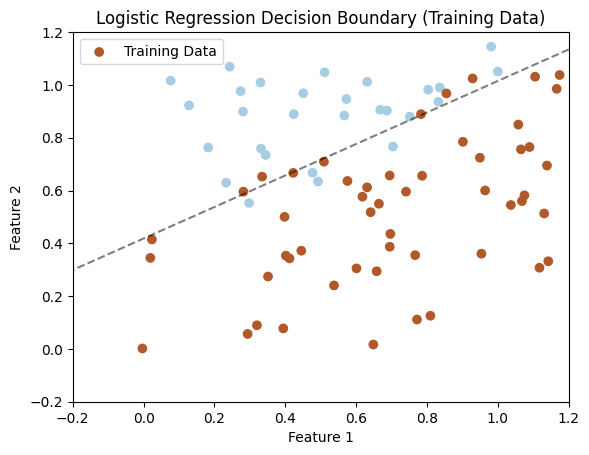

In [6]:
# Scatter plot of the training data points
plt.scatter(X[0, :80], X[1, :80], c=Y[:80], cmap=plt.cm.Paired, label='Training Data')

# Set axis limits for better visualization
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)

# Plot decision boundary for training data
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = np.dot(w.T, np.c_[xx.ravel(), yy.ravel()].T) + b
Z = sigmoid(Z)
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, colors='k', levels=[0.5], alpha=0.5, linestyles=['--'])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary (Training Data)')
plt.legend()
plt.show()


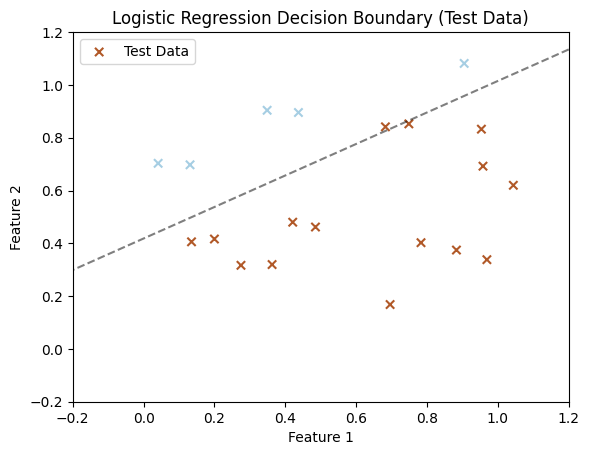

In [7]:
# Scatter plot of the test data points
plt.scatter(X[0, 80:], X[1, 80:], c=Y[80:], cmap=plt.cm.Paired, marker='x', label='Test Data')

# Set axis limits for better visualization
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)

# Plot decision boundary for test data
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = np.dot(w.T, np.c_[xx.ravel(), yy.ravel()].T) + b
Z = sigmoid(Z)
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, colors='k', levels=[0.5], alpha=0.5, linestyles=['--'])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary (Test Data)')
plt.legend()
plt.show()


## 5. Image Binary Classification (30 pts)



For Question 5 of the Python project, please complete it using two distinct Jupyter Notebook scripts. This entails using one notebook for the original dataset and another for the modified dataset. Consequently, you will be submitting a total of three .ipynb files as part of your Python project, ensuring clear separation and organization of your work.

Your tasks:
1. Your first task is to re-implement the classification model that was covered in our class. Please start from scratch and write the code independently. You can refer to the original code provided on Brightspace if you encounter any difficulties, but try to write the code on your own to reinforce your understanding.

2. After implementing the classification model, **report the indices of all the images in the test set for which the model's predictions are incorrect.** To maintain consistency with Python’s convention, please begin your indexing with 0. Additionally, **display the images of 4 of these failed cases for visual examination (you can display more if you like)**. This analysis might help us identify instances where the model is struggling in some applications.

3. Now you will modify the code to treat the dataset differently. The first 160 images plus the last digit of your Student ID will constitute the new training set, while the remaining images in the original training set will be your new test set. There are 209 images in the original training set. For example, if your ID ends with 0, the first 160 images will form your training set, and the remaining 49 images will be part of your test set. The test dataset is discarded and no longer used. Re-train the model using this modified dataset and **report the training and test accuracies**. Additionally, **provide the indices of all the images in the test set for which the model's predictions are incorrect. Display 4 of these misclassified images for further examination.**

By completing these tasks, you'll gain valuable insights into the classification model's performance and its behavior under different training and testing conditions.


  Datasets: [train]: train_catvnoncat.h5, [test]: test_catvnoncat.h5

In [10]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

# Load dataset
train_dataset = h5py.File('/content/sample_data/train_catvnoncat.h5', "r")
test_dataset = h5py.File('/content/sample_data/test_catvnoncat.h5', "r")

# Extract the data from the HDF5 file
train_set_x_orig = np.array(train_dataset["train_set_x"][:])  # shape: (m_train, num_px, num_px, 3)
train_set_y_orig = np.array(train_dataset["train_set_y"][:])  # shape: (m_train, )
test_set_x_orig = np.array(test_dataset["test_set_x"][:])     # shape: (m_test, num_px, num_px, 3)
test_set_y_orig = np.array(test_dataset["test_set_y"][:])     # shape: (m_test, )

# Reshape labels to match (m_train, 1)
train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

# Flatten the training and test set images
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T  # shape: (num_px * num_px * 3, m_train)
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T     # shape: (num_px * num_px * 3, m_test)

# Standardize the data to have values between 0 and 1
train_set_x = train_set_x_flatten / 255.0
test_set_x = test_set_x_flatten / 255.0

# Transpose the data to have samples in rows and features in columns
train_set_x = train_set_x.T
test_set_x = test_set_x.T

# Get labels
train_set_y = train_set_y_orig.T
test_set_y = test_set_y_orig.T

# Sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Function to compute cost
def compute_cost(A, Y):
    m = Y.shape[0]
    cost = -(1/m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
    return cost

# Gradient descent function
def gradient_descent(X, Y, num_iterations, learning_rate):
    # Initialize parameters
    n_features = X.shape[1]
    w = np.zeros((n_features, 1))
    b = 0.0
    m = X.shape[0]

    for i in range(num_iterations):
        # Forward propagation
        Z = np.dot(X, w) + b
        A = sigmoid(Z)

        # Compute cost
        cost = compute_cost(A, Y)

        # Backward propagation
        dw = (1/m) * np.dot(X.T, (A - Y))
        db = (1/m) * np.sum(A - Y)

        # Update parameters
        w -= learning_rate * dw
        b -= learning_rate * db

        # Print cost every 100 iterations (optional)
        if i % 100 == 0:
            print(f"Iteration {i}, cost: {cost:.4f}")

    return w, b

# Set hyperparameters
num_iterations = 2000
learning_rate = 0.005

# Train logistic regression model
w, b = gradient_descent(train_set_x, train_set_y, num_iterations, learning_rate)

# Prediction function
def predict(X, w, b):
    Z = np.dot(X, w) + b
    A = sigmoid(Z)
    return (A > 0.5).astype(int)

# Make predictions on the training set and the test set
train_predictions = predict(train_set_x, w, b)
test_predictions = predict(test_set_x, w, b)

# Calculate accuracy for training and test sets
train_accuracy = np.mean(train_predictions == train_set_y) * 100
test_accuracy = np.mean(test_predictions == test_set_y) * 100

print(f"Training Set Accuracy: {train_accuracy:.2f}%")
print(f"Test Set Accuracy: {test_accuracy:.2f}%")


Iteration 0, cost: 0.6931
Iteration 100, cost: 0.5845
Iteration 200, cost: 0.4669
Iteration 300, cost: 0.3760
Iteration 400, cost: 0.3315
Iteration 500, cost: 0.3033
Iteration 600, cost: 0.2799
Iteration 700, cost: 0.2600
Iteration 800, cost: 0.2429
Iteration 900, cost: 0.2280
Iteration 1000, cost: 0.2148
Iteration 1100, cost: 0.2031
Iteration 1200, cost: 0.1925
Iteration 1300, cost: 0.1830
Iteration 1400, cost: 0.1744
Iteration 1500, cost: 0.1665
Iteration 1600, cost: 0.1593
Iteration 1700, cost: 0.1527
Iteration 1800, cost: 0.1465
Iteration 1900, cost: 0.1409
Training Set Accuracy: 99.04%
Test Set Accuracy: 70.00%


Incorrectly classified indices: [ 5  6 10 11 13 18 19 28 29 30 33 34 41 44 46]


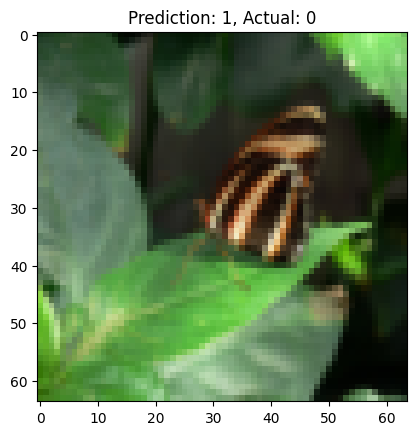

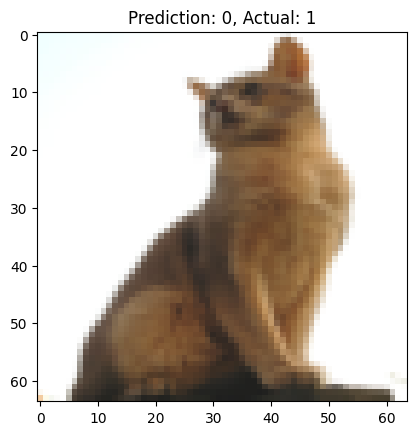

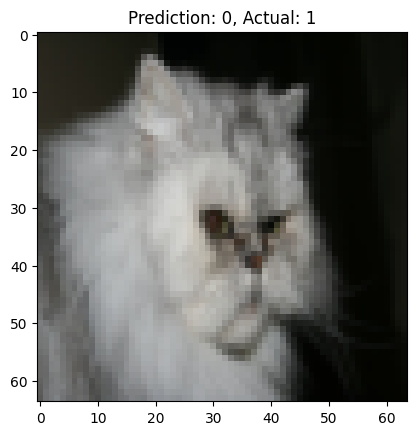

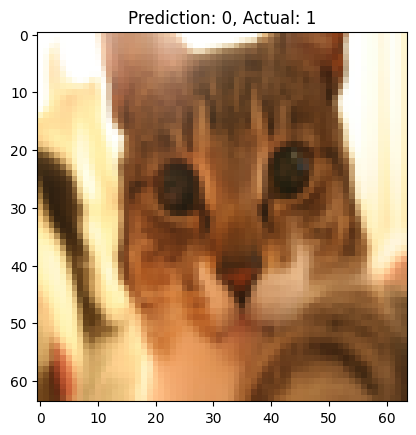

In [11]:
# Find indices of incorrectly classified images in the test set
incorrect_indices = np.where(test_predictions != test_set_y)[0]
print(f"Incorrectly classified indices: {incorrect_indices}")

# Display 4 of the incorrectly classified images
for i in range(min(4, len(incorrect_indices))):
    index = incorrect_indices[i]
    plt.imshow(test_set_x_orig[index])
    plt.title(f"Prediction: {test_predictions[index, 0]}, Actual: {test_set_y_orig[0, index]}")
    plt.show()


Iteration 0, cost: 0.6931
Iteration 100, cost: 0.5559
Iteration 200, cost: 0.4078
Iteration 300, cost: 0.3260
Iteration 400, cost: 0.2895
Iteration 500, cost: 0.2607
Iteration 600, cost: 0.2373
Iteration 700, cost: 0.2178
Iteration 800, cost: 0.2012
Iteration 900, cost: 0.1869
Iteration 1000, cost: 0.1745
Iteration 1100, cost: 0.1637
Iteration 1200, cost: 0.1540
Iteration 1300, cost: 0.1454
Iteration 1400, cost: 0.1377
Iteration 1500, cost: 0.1307
Iteration 1600, cost: 0.1244
Iteration 1700, cost: 0.1187
Iteration 1800, cost: 0.1134
Iteration 1900, cost: 0.1086
Training Set Accuracy: 100.00%
Test Set Accuracy: 50.00%
Incorrectly classified indices: [ 0  2  3  4  5  6  8 10 12 16 18 21 25 28 29 30 31 33 35 37 38]


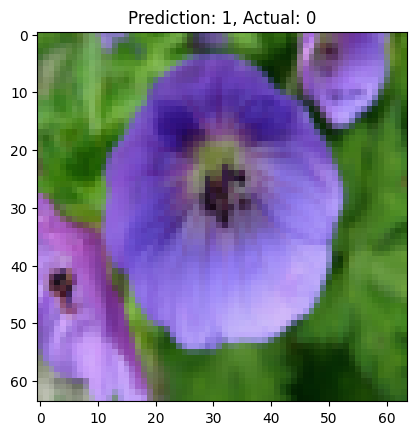

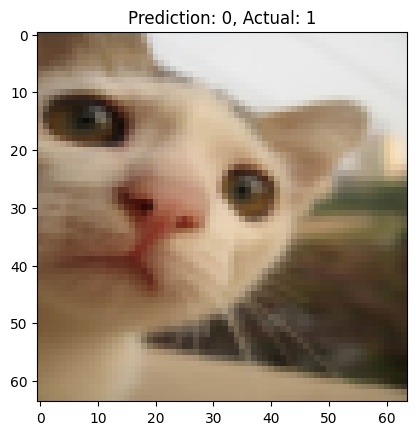

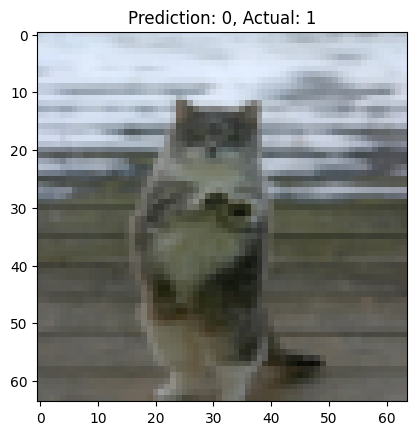

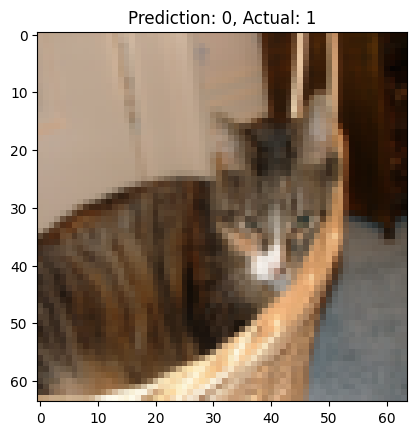

In [3]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

# Load dataset
train_dataset = h5py.File('/content/sample_data/train_catvnoncat.h5', "r")
test_dataset = h5py.File('/content/sample_data/test_catvnoncat.h5', "r")

# Extract data
train_set_x_orig = np.array(train_dataset["train_set_x"][:])
train_set_y_orig = np.array(train_dataset["train_set_y"][:])

# Reshape labels to match dimensions
train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))

# Flatten the dataset
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T

# Normalize the data
train_set_x = train_set_x_flatten / 255.0

# Transpose to match sample-row format
train_set_x = train_set_x.T
train_set_y = train_set_y_orig.T

# Split dataset as per the task requirements
last_digit = 7  # Last digit of the student ID
num_train = 160 + last_digit  # New training set size
new_train_set_x = train_set_x[:num_train]
new_train_set_y = train_set_y[:num_train]

new_test_set_x = train_set_x[num_train:]
new_test_set_y = train_set_y[num_train:]

# Sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Function to compute the cost
def compute_cost(A, Y):
    m = Y.shape[0]
    cost = -(1/m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
    return cost

# Gradient descent function
def gradient_descent(X, Y, num_iterations, learning_rate):
    n_features = X.shape[1]
    w = np.zeros((n_features, 1))
    b = 0.0
    m = X.shape[0]

    for i in range(num_iterations):
        # Forward propagation
        Z = np.dot(X, w) + b
        A = sigmoid(Z)
        cost = compute_cost(A, Y)

        # Backward propagation
        dw = (1/m) * np.dot(X.T, (A - Y))
        db = (1/m) * np.sum(A - Y)

        # Update parameters
        w -= learning_rate * dw
        b -= learning_rate * db

        # Print cost every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}, cost: {cost:.4f}")

    return w, b

# Prediction function
def predict(X, w, b):
    Z = np.dot(X, w) + b
    A = sigmoid(Z)
    return (A > 0.5).astype(int)

# Set hyperparameters
num_iterations = 2000
learning_rate = 0.005

# Train the logistic regression model
w, b = gradient_descent(new_train_set_x, new_train_set_y, num_iterations, learning_rate)

# Make predictions on the training set and the test set
train_predictions = predict(new_train_set_x, w, b)
test_predictions = predict(new_test_set_x, w, b)

# Calculate accuracy
train_accuracy = np.mean(train_predictions == new_train_set_y) * 100
test_accuracy = np.mean(test_predictions == new_test_set_y) * 100

print(f"Training Set Accuracy: {train_accuracy:.2f}%")
print(f"Test Set Accuracy: {test_accuracy:.2f}%")

# Find indices of incorrectly classified images
incorrect_indices = np.where(test_predictions != new_test_set_y)[0]
print(f"Incorrectly classified indices: {incorrect_indices}")

# Display 4 of the misclassified images
for i in range(min(4, len(incorrect_indices))):
    index = incorrect_indices[i]
    plt.imshow(train_set_x_orig[num_train + index])
    plt.title(f"Prediction: {test_predictions[index, 0]}, Actual: {new_test_set_y[index, 0]}")
    plt.show()
